<a href="https://colab.research.google.com/github/mglmaynard/Repository-v1/blob/main/PSA_Portfolio_PCA_page_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Step 1: Install openpyxl if needed (for .xlsx files)
!pip install openpyxl

# Step 2: Import necessary libraries
import pandas as pd
from google.colab import files

# Step 3: Upload the Excel file
uploaded = files.upload()

# Step 4: Load Excel file into a pandas DataFrame
# Replace 'your_file.xlsx' with the actual filename after upload
df = pd.read_excel("CPI_cleaned.xlsx", engine="openpyxl")

# Step 5: Display the data
df.head()


Saving CPI_cleaned.xlsx to CPI_cleaned.xlsx


,Commodity Group,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00
0,Food and Non-Alcoholic Beverages,128.9,129.3,128.9,128.7,128.7,129.5,130.4,130.4,129.8,130.4,131.3,132.3,133.8,132.6,131.8,129.9,129.8,130.0
1,Clothing and Footwear,117.0,117.4,117.9,118.2,118.4,118.5,118.7,119.0,119.1,119.2,119.3,119.4,119.7,119.9,120.0,120.1,120.3,120.5
2,"Housing, Water, Electricity, Gas and Other Fuels",118.8,119.8,119.8,119.2,119.8,118.4,120.0,120.9,121.2,120.9,120.7,121.2,121.4,121.7,121.8,122.6,122.6,122.2
3,"Furnishings, Household Equipment and Routine H...",120.2,120.7,121.1,121.2,121.5,121.6,121.8,121.9,122.1,122.2,122.8,123.0,123.3,123.5,123.7,123.8,123.9,124.2
4,Health,121.5,122.0,122.4,122.5,122.7,122.9,123.1,123.2,123.5,123.7,124.0,124.2,124.5,124.8,125.1,125.4,125.7,125.9


In [17]:
# Example: assume your first column is 'Goods'
# and the rest are months with CPI values

# Convert all CPI columns to numeric (excluding the first column)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [18]:
df.set_index("Commodity Group", inplace=True)
df_pct_change = df.pct_change(axis=1) * 100
df_pct_change.head()


,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00
Commodity Group,,,,,,,,,,,,,,,,,,
Food and Non-Alcoholic Beverages,NaN,0.310318,-0.309358,-0.155159,0.000000,0.621601,0.694981,0.000000,-0.460123,0.462250,0.690184,0.761615,1.133787,-0.896861,-0.603318,-1.441578,-0.076982,0.154083
Clothing and Footwear,NaN,0.341880,0.425894,0.254453,0.169205,0.084459,0.168776,0.252738,0.084034,0.083963,0.083893,0.083822,0.251256,0.167084,0.083403,0.083333,0.166528,0.166251
"Housing, Water, Electricity, Gas and Other Fuels",NaN,0.841751,0.000000,-0.500835,0.503356,-1.168614,1.351351,0.750000,0.248139,-0.247525,-0.165426,0.414250,0.165017,0.247117,0.082169,0.656814,0.000000,-0.326264
"Furnishings, Household Equipment and Routine Household Maintenance",NaN,0.415973,0.331400,0.082576,0.247525,0.082305,0.164474,0.082102,0.164069,0.081900,0.490998,0.162866,0.243902,0.162206,0.161943,0.080841,0.080775,0.242131
Health,NaN,0.411523,0.327869,0.081699,0.163265,0.162999,0.162734,0.081235,0.243506,0.161943,0.242522,0.161290,0.241546,0.240964,0.240385,0.239808,0.239234,0.159109


In [20]:
# Ensure correct dtypes
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (optional, but required for PCA)
df_clean = df.dropna()


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Scale the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Apply PCA
pca = PCA(n_components=2)  # You can increase this if needed
X_pca = pca.fit_transform(X_scaled)

# Put into a DataFrame for plotting or clustering
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"], index=df_clean.index)

# View result
pca_df.head()


,PC1,PC2
Commodity Group,,
Food and Non-Alcoholic Beverages,3.408261,-0.038230
Clothing and Footwear,-1.865941,0.014638
"Housing, Water, Electricity, Gas and Other Fuels",-1.075709,-0.114550
"Furnishings, Household Equipment and Routine Household Maintenance",-0.313813,-0.095131
Health,0.324467,-0.156337


/tmp/ipython-input-2048027412.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (pca_df["PC1"][i], pca_df["PC2"][i]), fontsize=8)


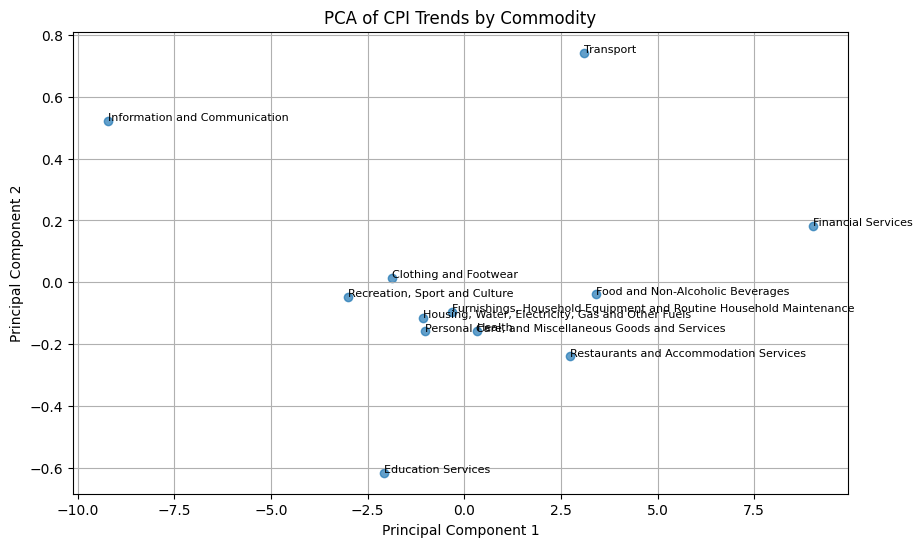

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7)
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df["PC1"][i], pca_df["PC2"][i]), fontsize=8)

plt.title("PCA of CPI Trends by Commodity")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [24]:
explained_var = pca.explained_variance_ratio_
print(f"Explained Variance by PC1 and PC2: {explained_var[0]:.2%}, {explained_var[1]:.2%}")
#Percentage share of PC1 Eigenvalue to total Eigenvalue, same holds for PC2

Explained Variance by PC1 and PC2: 99.12%, 0.63%


In [26]:
import pandas as pd

# Let's assume these are your month names (in the same order as your columns)
months = df.columns.tolist()

# Loadings: shape (2, number_of_months)
loadings = pd.DataFrame(pca.components_.T, index=months, columns=['PC1', 'PC2'])

# View the loadings
print(loadings)


                 PC1       PC2
2024-01-01  0.235354  0.267169
2024-02-01  0.235259  0.317513
2024-03-01  0.235413  0.305509
2024-04-01  0.234957  0.349068
2024-05-01  0.235345  0.296266
2024-06-01  0.235401  0.271719
2024-07-01  0.236204  0.160999
2024-08-01  0.236386 -0.065060
2024-09-01  0.236054 -0.179942
2024-10-01  0.236134 -0.180701
2024-11-01  0.236219 -0.165666
2024-12-01  0.236325 -0.097199
2025-01-01  0.235736 -0.103587
2025-02-01  0.236272 -0.115183
2025-03-01  0.236217 -0.180231
2025-04-01  0.235603 -0.235346
2025-05-01  0.234907 -0.304656
2025-06-01  0.234841 -0.338016


In [28]:
import pandas as pd
import numpy as np

# Assuming `X_pca` is your PCA-transformed data and df.index has the commodity names
pc1_scores = X_pca[:, 0]

# Create a DataFrame for easier sorting
pc1_df = pd.DataFrame({
    'Commodity': df.index,
    'PC1_Score': pc1_scores
})

# Get top 5 commodities most influenced by PC1
top_pc1 = pc1_df.sort_values(by='PC1_Score', ascending=False).head(5)

# Get bottom 5 (strong negative influence — also interesting)
bottom_pc1 = pc1_df.sort_values(by='PC1_Score', ascending=True).head(5)

print("🔼 Top 5 commodities with highest PC1 scores:")
print(top_pc1)

print("\n🔽 Bottom 5 commodities with lowest PC1 scores:")
print(bottom_pc1)


🔼 Top 5 commodities with highest PC1 scores:
                                 Commodity  PC1_Score
10                      Financial Services   9.014814
0         Food and Non-Alcoholic Beverages   3.408261
5                                Transport   3.094791
9   Restaurants and Accommodation Services   2.727465
4                                   Health   0.324467

🔽 Bottom 5 commodities with lowest PC1 scores:
                                          Commodity  PC1_Score
6                     Information and Communication  -9.215465
7                     Recreation, Sport and Culture  -3.021246
8                                Education Services  -2.071879
1                             Clothing and Footwear  -1.865941
2  Housing, Water, Electricity, Gas and Other Fuels  -1.075709


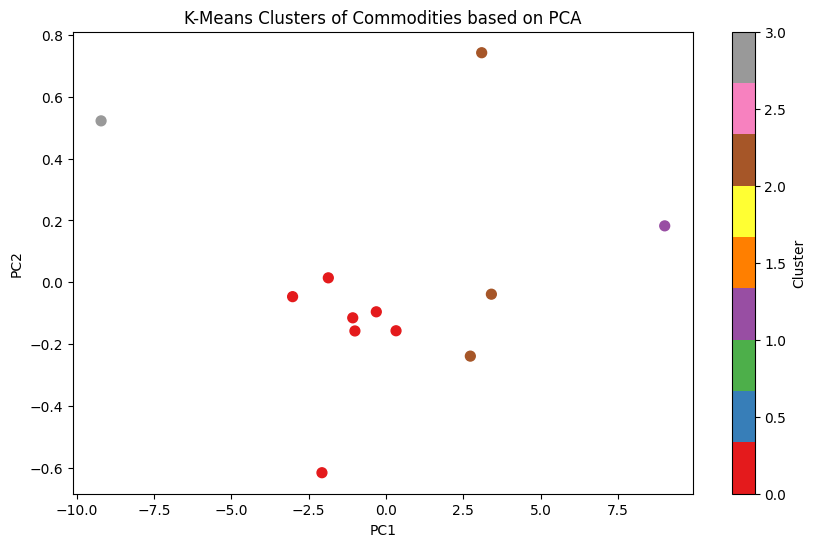

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume X_pca is your PCA-transformed data (e.g., 2 components)
k = 4  # Number of clusters, you can tune this

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to your commodity DataFrame
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

# Visualize clusters on PC1 vs PC2
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters of Commodities based on PCA')
plt.colorbar(scatter, label='Cluster')
plt.show()


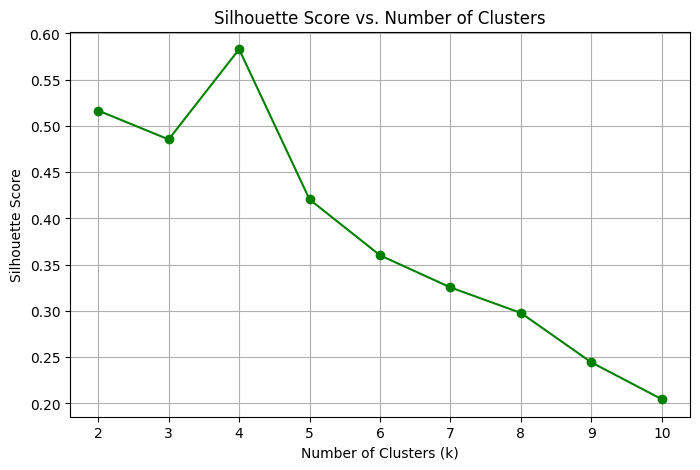

In [31]:
#Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


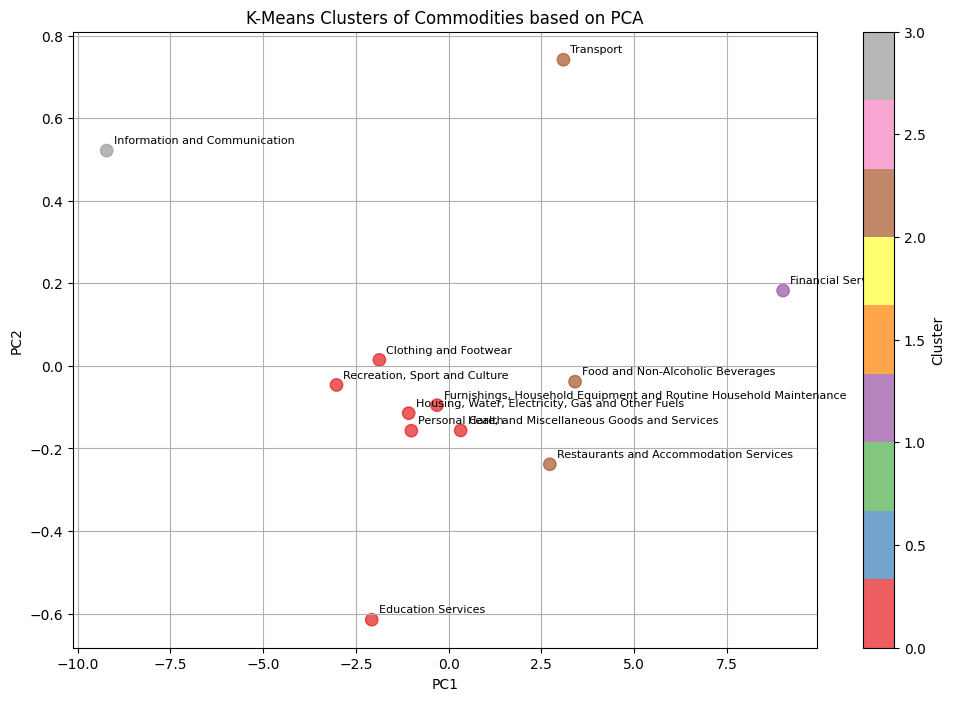

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume X_pca is your PCA-transformed data (e.g., 2 components)
k = 4  # Number of clusters, you can tune this

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to your commodity DataFrame
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

# Visualize clusters on PC1 vs PC2 with labels
plt.figure(figsize=(12,8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=80, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters of Commodities based on PCA')
plt.colorbar(scatter, label='Cluster')

# Add text labels (commodity names) near points
for i, txt in enumerate(df_clustered.index):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]),
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)

plt.grid(True)
plt.show()
